# Continuous Function Approximater

> A single hidden layer neural network with a linear output unit can approximate any continuous function arbitrarily well, given enough hidden units.

This IPython notebook walks through the anatomy of a feed-forward neural network written in Tensorflow with (purposely) a single hidden layer, and demonstrates how well or poorly the said neural network approximates some function.

In [54]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

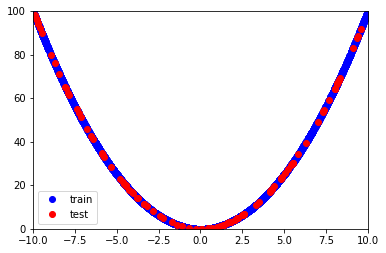

In [55]:
# Tweak the values below
n_train = 5000
n_test = 100
X_min = -10.
X_max = 10.
n_hidden_units = 200
learning_rate = 0.008
num_steps = 801

def func_to_approximate(X):
    return np.square(X)

# Sanity check
assert n_train > 0
assert n_test > 0
assert X_max > X_min

X_interval = X_max - X_min
# Generate training data
X_train = np.random.random_sample((n_train, 1)) * X_interval + X_min
y_train = func_to_approximate(X_train)
# Generate test data
X_test = np.random.random_sample((n_test, 1)) * X_interval + X_min
y_test = func_to_approximate(X_test)

# Plot training data and test data
plt.figure()
plt.axis([X_min, X_max, min(y_train), max(y_train)])
plt.plot(X_train, y_train, 'bo', label='train')
plt.plot(X_test, y_test, 'ro', label='test')
plt.legend()
plt.show()

In [56]:
X_placeholder = tf.placeholder(tf.float32, shape=(None, 1), name='X_placeholder')
y_placeholder = tf.placeholder(tf.float32, shape=(None, 1), name='y_placeholder')

h_weights = tf.Variable(
    tf.truncated_normal([1, n_hidden_units]),
    name='h_weights')
h_biases = tf.Variable(tf.zeros([n_hidden_units]),
                       name='h_biases')

out_weights = tf.Variable(
    tf.truncated_normal([n_hidden_units, 1]),
    name='out_weights')
out_biases = tf.Variable(tf.zeros([1]),
                         name='out_biases')

In [57]:
hidden = tf.nn.sigmoid(tf.matmul(X_placeholder, h_weights) + h_biases)
y = tf.matmul(hidden, out_weights) + out_biases

In [58]:
loss = tf.reduce_mean(tf.square(y - y_placeholder))
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)

========== Step 0 ==========
loss_train 1895.57 loss_test 938.74


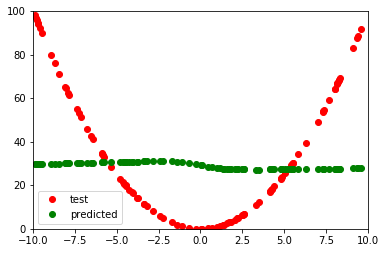

========== Step 40 ==========
loss_train 399.301 loss_test 401.124


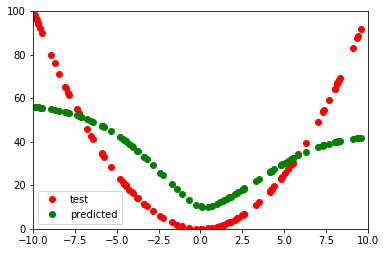

========== Step 80 ==========
loss_train 203.162 loss_test 211.04


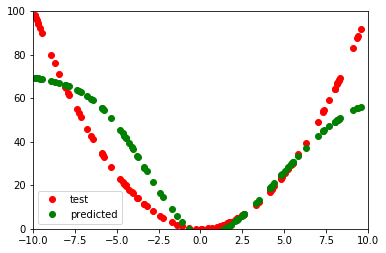

========== Step 120 ==========
loss_train 198.279 loss_test 204.752


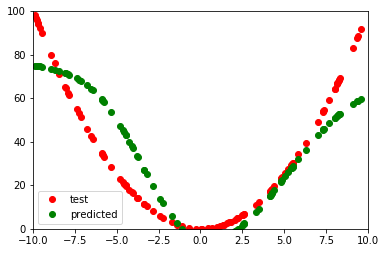

========== Step 160 ==========
loss_train 184.537 loss_test 188.506


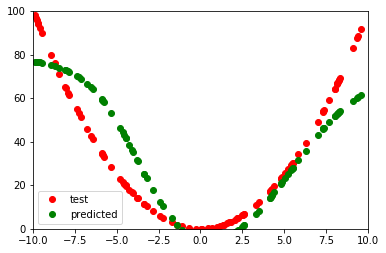

========== Step 200 ==========
loss_train 167.825 loss_test 170.05


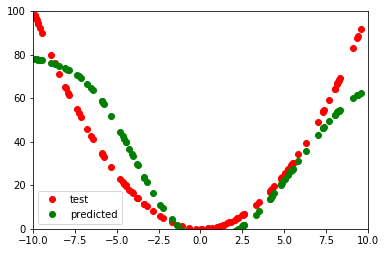

========== Step 240 ==========
loss_train 152.464 loss_test 153.276


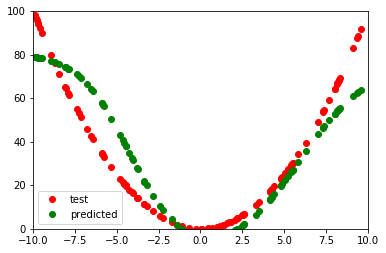

========== Step 280 ==========
loss_train 139.066 loss_test 138.739


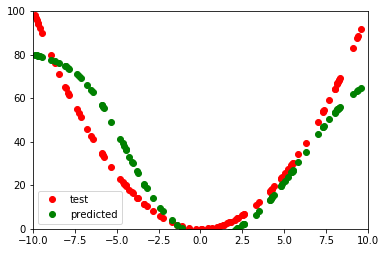

========== Step 320 ==========
loss_train 127.467 loss_test 126.257


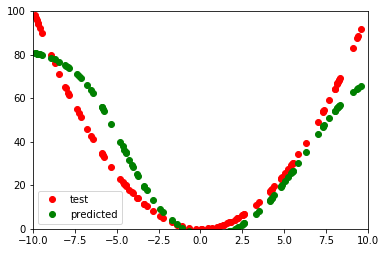

========== Step 360 ==========
loss_train 117.422 loss_test 115.545


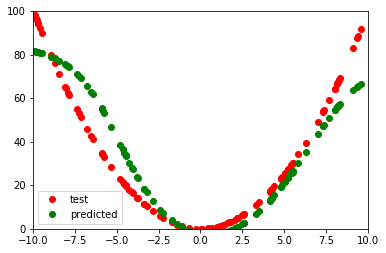

========== Step 400 ==========
loss_train 108.685 loss_test 106.316


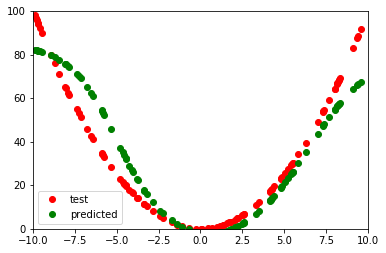

========== Step 440 ==========
loss_train 101.038 loss_test 98.3262


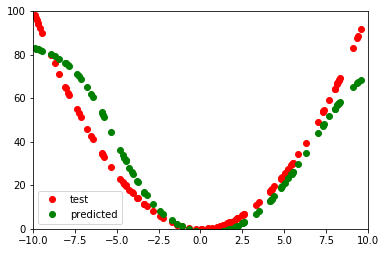

========== Step 480 ==========
loss_train 94.298 loss_test 91.358


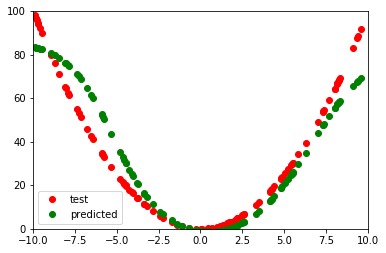

========== Step 520 ==========
loss_train 88.3288 loss_test 85.2342


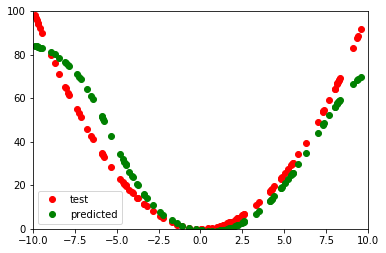

========== Step 560 ==========
loss_train 83.0246 loss_test 79.8212


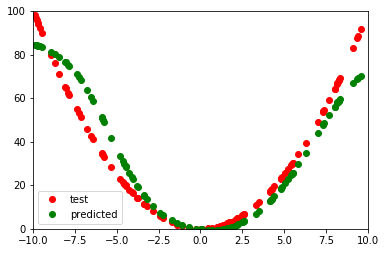

========== Step 600 ==========
loss_train 78.2887 loss_test 75.0135


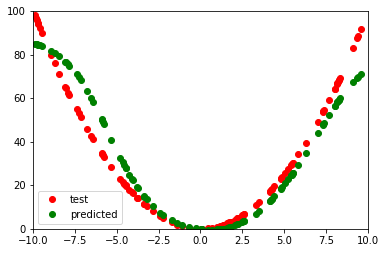

========== Step 640 ==========
loss_train 74.0355 loss_test 70.7219


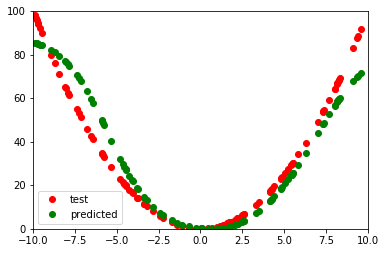

========== Step 680 ==========
loss_train 70.1943 loss_test 66.8707


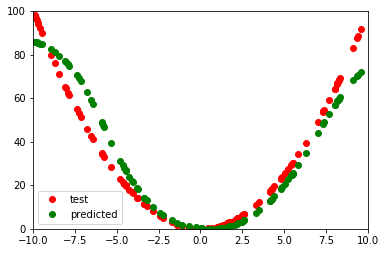

========== Step 720 ==========
loss_train 66.7073 loss_test 63.3953


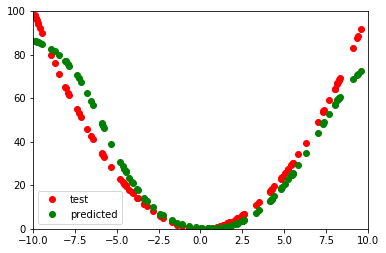

========== Step 760 ==========
loss_train 63.5283 loss_test 60.2411


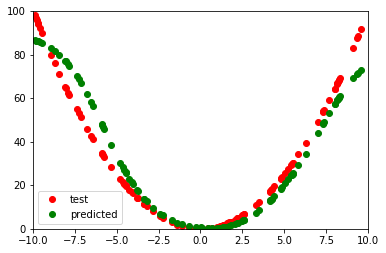

========== Step 800 ==========
loss_train 60.6196 loss_test 57.3641


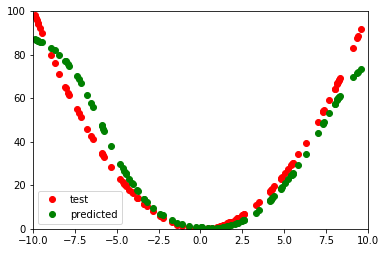

In [59]:
with tf.Session() as session:
    tf.global_variables_initializer().run()

    for step in range(num_steps):
        feed_dict_train = {X_placeholder: X_train, y_placeholder : y_train}
        _, loss_train = session.run([train, loss], feed_dict=feed_dict_train)
        
        if step % 40 == 0:
            feed_dict_test = {X_placeholder: X_test, y_placeholder : y_test}
            loss_test, y_test_predicted = session.run([loss, y], feed_dict=feed_dict_test)
            print('========== Step', step, '==========')
            print('loss_train', loss_train, 'loss_test', loss_test)
            plt.figure()
            plt.axis([X_min, X_max, min(y_train), max(y_train)])
            plt.plot(X_test, y_test, 'ro', label='test')
            plt.plot(X_test, y_test_predicted, 'go', label='predicted')
            plt.legend()
            plt.show()